In [110]:
import keras
from keras.layers import *
from keras.utils import to_categorical
from keras.models import Sequential
import matplotlib.pyplot as plt,zipfile 
import numpy as np
import pandas as pd
from keras.preprocessing import image,image_dataset_from_directory
from keras.preprocessing.image import ImageDataGenerator
import cv2
import os
import tensorflow as tf
import glob
import random
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn
from PIL import Image 

**Crop Train Images**

---



In [ ]:
# df = pd.read_csv('/content/drive/MyDrive/classification/train_annotations.csv')

# label_id = np.array(df['filename'])
# classes = np.array(df['class'])
# x_min = np.array(df['xmin'])
# y_min = np.array(df['ymin'])
# x_max = np.array(df['xmax'])
# y_max = np.array(df['ymax'])

# all_images = glob.glob('/content/drive/MyDrive/classification/train/*')

# img_id = []
# for i in all_images:
#   img_id.append(i.split("/")[-1])

# for i in range(0,len(all_images)):
#   for j in range(0,len(label_id)):

#     if img_id[i] == label_id[j]:
#       img = Image.open(all_images[i])
#       cropped = img.crop((x_min[j],y_min[j],x_max[j],y_max[j]))

#       if classes[j] == 'apple':
#             cropped.save('/content/drive/MyDrive/classification/apple/'+str(j)+img_id[i])
#       if classes[j] == 'banana':
#           cropped.save('/content/drive/MyDrive/classification/banana/'+str(j)+img_id[i])
#       if classes[j] == 'orange':
#           cropped.save('/content/drive/MyDrive/classification/orange/'+str(j)+img_id[i])
#       if classes[j] == 'peach':
#           cropped.save('/content/drive/MyDrive/classification/peach/'+str(j)+img_id[i])
#       if classes[j] == 'pear':
#           cropped.save('/content/drive/MyDrive/classification/pear/'+str(j)+img_id[i])

**Crop Test Images**

---



In [ ]:
# df = pd.read_csv('/content/drive/MyDrive/classification/valid_annotations.csv')

# label_id = np.array(df['filename'])
# classes = np.array(df['class'])
# x_min = np.array(df['xmin'])
# y_min = np.array(df['ymin'])
# x_max = np.array(df['xmax'])
# y_max = np.array(df['ymax'])

# all_images_valid = glob.glob('/content/drive/MyDrive/classification/valid/*')

# img_id_valid = []
# for i in all_images_valid:
#   img_id_valid.append(i.split("/")[-1])

# for i in range(0,len(all_images_valid)):
#   for j in range(0,len(label_id)):

#     if img_id_valid[i] == label_id[j]:
#       img = Image.open(all_images_valid[i])
#       cropped = img.crop((x_min[j],y_min[j],x_max[j],y_max[j]))

#       if classes[j] == 'apple':
#             cropped.save('/content/drive/MyDrive/val_apple/'+str(j)+img_id_valid[i])
#       if classes[j] == 'banana':
#           cropped.save('/content/drive/MyDrive/val_banana/'+str(j)+img_id_valid[i])
#       if classes[j] == 'orange':
#           cropped.save('/content/drive/MyDrive/val_orange/'+str(j)+img_id_valid[i])
#       if classes[j] == 'peach':
#           cropped.save('/content/drive/MyDrive/val_peach/'+str(j)+img_id_valid[i])
#       if classes[j] == 'pear':
#           cropped.save('/content/drive/MyDrive/val_pear/'+str(j)+img_id_valid[i])  

In [96]:
apple_train = glob.glob('/content/drive/MyDrive/fruits/train/apple/*')
banana_train = glob.glob('/content/drive/MyDrive/fruits/train/banana/*')
orange_train = glob.glob('/content/drive/MyDrive/fruits/train/orange/*')
peach_train = glob.glob('/content/drive/MyDrive/fruits/train/peach/*')
pear_train = glob.glob('/content/drive/MyDrive/fruits/train/pear/*')

In [97]:
apple_test = glob.glob('/content/drive/MyDrive/fruits/valid/apple/*')
banana_test = glob.glob('/content/drive/MyDrive/fruits/valid/banana/*')
orange_test = glob.glob('/content/drive/MyDrive/fruits/valid/orange/*')
peach_test = glob.glob('/content/drive/MyDrive/fruits/valid/peach/*')
pear_test = glob.glob('/content/drive/MyDrive/fruits/valid/pear/*')

In [ ]:
train_array = []

for i in range(len(apple_train)):
  print(apple_train[i])
  img_array=cv2.imread(apple_train[i])
  img_array=cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
  img_array=cv2.resize(img_array,(50,50))
  train_array.append([img_array,0])

for i in range(len(banana_train)):
  print(banana_train[i])
  img_array=cv2.imread(banana_train[i])
  img_array=cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
  img_array=cv2.resize(img_array,(50,50))
  train_array.append([img_array,1])

for i in range(len(orange_train)):
  print(orange_train[i])
  img_array=cv2.imread(orange_train[i])
  img_array=cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
  img_array=cv2.resize(img_array,(50,50))
  train_array.append([img_array,2])

for i in range(len(peach_train)):
  print(peach_train[i])
  img_array=cv2.imread(peach_train[i])
  img_array=cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
  img_array=cv2.resize(img_array,(50,50))
  train_array.append([img_array,3])

for i in range(len(pear_train)):
  print(pear_train[i])
  img_array=cv2.imread(pear_train[i])
  img_array=cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
  img_array=cv2.resize(img_array,(50,50))
  train_array.append([img_array,4])


random.shuffle(train_array)

x_train=[]
y_train=[]
for features,label in train_array:
    x_train.append(features)
    y_train.append(label)

x_train=np.array(x_train)
y_train=np.array(y_train)

In [ ]:
test_array = []

for i in range(len(apple_test)):
  print(apple_test[i])
  img_array=cv2.imread(apple_test[i])
  img_array=cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
  img_array=cv2.resize(img_array,(50,50))
  test_array.append([img_array,0])

for i in range(len(banana_test)):
  print(banana_test[i])
  img_array=cv2.imread(banana_test[i])
  img_array=cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
  img_array=cv2.resize(img_array,(50,50))
  test_array.append([img_array,1])

for i in range(len(orange_test)):
  print(orange_test[i])
  img_array=cv2.imread(orange_test[i])
  img_array=cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
  img_array=cv2.resize(img_array,(50,50))
  test_array.append([img_array,2])


for i in range(len(peach_test)):
  print(peach_test[i])
  img_array=cv2.imread(peach_test[i])
  img_array=cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
  img_array=cv2.resize(img_array,(50,50))
  test_array.append([img_array,3])

for i in range(len(pear_test)):
  print(pear_test[i])
  img_array=cv2.imread(pear_test[i])
  img_array=cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
  img_array=cv2.resize(img_array,(50,50))
  test_array.append([img_array,4])


random.shuffle(test_array)

x_test=[]
y_test=[]
for features,label in test_array:
    x_test.append(features)
    y_test.append(label)

x_test=np.array(x_test)
y_test=np.array(y_test)

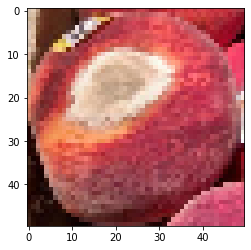

In [100]:
plt.imshow(x_test[0])

In [101]:
from keras.utils import to_categorical
y_train_n = to_categorical(y_train,dtype = 'float32')
y_test_n = to_categorical(y_test,dtype = 'float32')

In [ ]:
x_train = x_train / 255.0
x_test  = x_test / 255.0

x_train.astype('float32')
x_test.astype('float32')

**CNN**

---



In [ ]:
from keras.optimizers import Adam

CNN=Sequential()
CNN.add(Conv2D(filters=16,kernel_size=(4,4),padding="Same",activation="relu",input_shape=(50,50,3)))
CNN.add(MaxPool2D(pool_size=(2,2)))
CNN.add(Dropout(0.35))

CNN.add(Conv2D(filters=32,kernel_size=(4,4),padding="Same",activation="relu"))
CNN.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
CNN.add(Dropout(0.35))

CNN.add(Conv2D(filters=64,kernel_size=(4,4),padding="Same",activation="relu"))
CNN.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
CNN.add(Dropout(0.35))

CNN.add(Flatten())
CNN.add(Dense(512,activation="relu"))
CNN.add(Dropout(0.5))
CNN.add(Dense(5,activation="softmax"))


CNN.compile(optimizer='adam',loss="categorical_crossentropy",metrics=["accuracy"])
CNN_result = CNN.fit(x_train,y_train_n,batch_size=64,epochs=50,validation_data = (x_test,y_test_n),verbose = 1)


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

       apple       0.72      0.78      0.75       130
      banana       0.87      0.82      0.85       101
      orange       0.88      0.70      0.78        81
       peach       0.80      0.89      0.84       153
        pear       0.79      0.73      0.76        93

    accuracy                           0.80       558
   macro avg       0.81      0.79      0.80       558
weighted avg       0.80      0.80      0.80       558



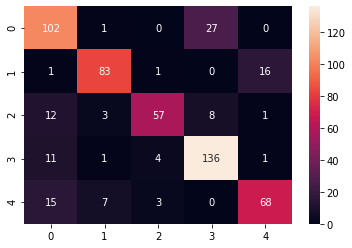

In [104]:
y_hat = CNN.predict_classes(x_test,verbose=0)
target_names = ["apple","banana","orange","peach","pear"]
print(classification_report(y_test,y_hat,target_names=target_names))
cnf_matrix=confusion_matrix(y_test,y_hat)
seaborn.heatmap(cnf_matrix,annot=True,fmt="d")


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

       apple       1.00      0.96      0.98       452
      banana       0.99      1.00      0.99       255
      orange       1.00      0.99      1.00       193
       peach       0.93      1.00      0.96       241
        pear       1.00      0.99      0.99       274

    accuracy                           0.98      1415
   macro avg       0.98      0.99      0.99      1415
weighted avg       0.99      0.98      0.98      1415



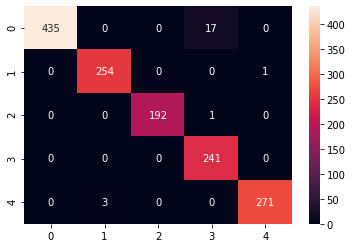

In [105]:
y_hat = CNN.predict_classes(x_train,verbose=0)
target_names = ["apple","banana","orange","peach","pear"]
print(classification_report(y_train,y_hat,target_names=target_names))
cnf_matrix=confusion_matrix(y_train,y_hat)
seaborn.heatmap(cnf_matrix,annot=True,fmt="d")


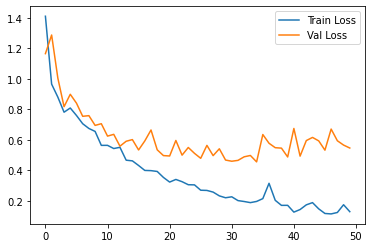

In [106]:
train_loss = CNN_result.history['loss']
val_loss = CNN_result.history['val_loss']
plt.plot(train_loss)
plt.plot(val_loss)
plt.legend(['Train Loss','Val Loss'])

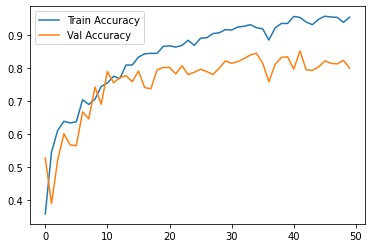

In [107]:
train_acc = CNN_result.history['accuracy']
val_acc = CNN_result.history['val_accuracy']
plt.plot(train_acc)
plt.plot(val_acc)
plt.legend(['Train Accuracy','Val Accuracy'])

**MLP**

---



In [ ]:
MLP = Sequential()
MLP.add(Flatten(input_shape=(50,50,3)))
MLP.add(Dense(256,activation='relu'))
MLP.add(Dense(128,activation='relu'))
MLP.add(Dense(64,activation='relu'))
MLP.add(Dense(32,activation='relu'))
MLP.add(Dense(16,activation='relu'))
MLP.add(Dense(5,activation='softmax'))
MLP.compile(optimizer='adam',loss ='categorical_crossentropy',metrics=['acc'])
MLP.summary()
MLP_result = MLP.fit(x_train,y_train_n,validation_data=(x_test,y_test_n) ,batch_size=32,epochs=50,verbose=1)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

       apple       0.62      0.92      0.74       130
      banana       0.77      0.65      0.71       101
      orange       0.71      0.69      0.70        81
       peach       0.94      0.53      0.68       153
        pear       0.70      0.85      0.77        93

    accuracy                           0.72       558
   macro avg       0.75      0.73      0.72       558
weighted avg       0.76      0.72      0.72       558



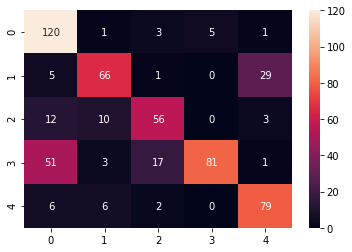

In [111]:
y_hat = MLP.predict_classes(x_test,verbose=0)
target_names = ["apple","banana","orange","peach","pear"]
print(classification_report(y_test,y_hat,target_names=target_names))
cnf_matrix=confusion_matrix(y_test,y_hat)
seaborn.heatmap(cnf_matrix,annot=True,fmt="d")

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

       apple       0.91      0.98      0.95       452
      banana       0.98      0.94      0.96       255
      orange       0.97      0.98      0.98       193
       peach       0.98      0.88      0.93       241
        pear       0.97      0.97      0.97       274

    accuracy                           0.96      1415
   macro avg       0.96      0.95      0.96      1415
weighted avg       0.96      0.96      0.96      1415



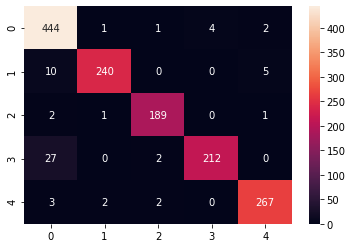

In [112]:
y_hat = MLP.predict_classes(x_train,verbose=0)
target_names = ["apple","banana","orange","peach","pear"]
print(classification_report(y_train,y_hat,target_names=target_names))
cnf_matrix=confusion_matrix(y_train,y_hat)
seaborn.heatmap(cnf_matrix,annot=True,fmt="d")

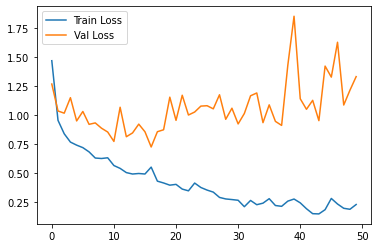

In [113]:
train_loss = MLP_result.history['loss']
val_loss = MLP_result.history['val_loss']
plt.plot(train_loss)
plt.plot(val_loss)
plt.legend(['Train Loss','Val Loss'])

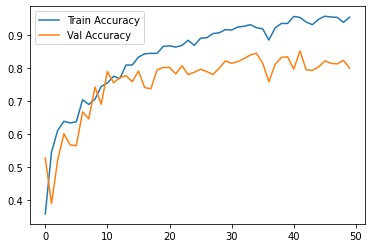

In [114]:
train_acc = CNN_result.history['accuracy']
val_acc = CNN_result.history['val_accuracy']
plt.plot(train_acc)
plt.plot(val_acc)
plt.legend(['Train Accuracy','Val Accuracy'])

**Test Function**

---



In [93]:
def test(model,path):

  Sample_Image = tf.keras.preprocessing.image.load_img(path, target_size = (50, 50))
  Sample_Image = np.array(Sample_Image)/255.0
  predicted_class = model.predict(np.expand_dims(Sample_Image, axis = 0))
  predicted_class = np.argmax(predicted_class)

  if predicted_class == 0 :
     print('apple\n')
  if predicted_class == 1 :
     print('banana\n')
  if predicted_class == 2 :
     print('orange\n')
  if predicted_class == 3 :
     print('peach\n')
  if predicted_class == 4 :
     print('pear\n')
 
  plt.imshow(Sample_Image)

peach



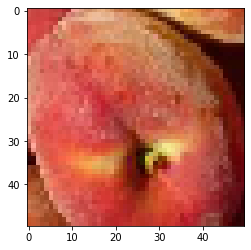

In [117]:
test(CNN,'/content/p2.jpg')

peach



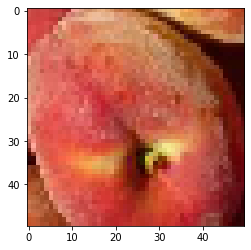

In [118]:
test(MLP,'/content/p2.jpg')